# Notebook that demonstrates Bayesian blocks and HOP algorithm

In [1]:
import numpy as np
from scipy import stats
from fermiAnalysis import bblocks, hop
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Create some fake data

In [3]:
np.random.seed(0)
x = np.concatenate([stats.cauchy(-5, 1.8).rvs(500),
                    stats.cauchy(-4, 0.8).rvs(2000),
                    stats.cauchy(-1, 0.3).rvs(500),
                    stats.cauchy(2, 0.8).rvs(1000),
                    stats.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
x = x[(x > -15) & (x < 15)]

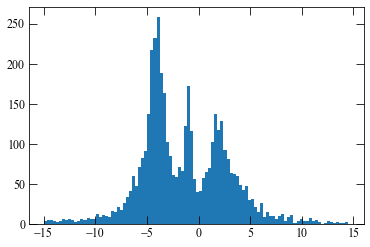

In [4]:
n, bins, patches = plt.hist(x, bins=100)

In [5]:
nobs = stats.poisson.rvs(n)
nerr = np.sqrt(nobs)

<Container object of 3 artists>

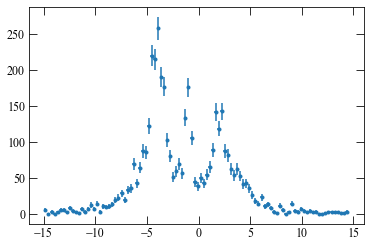

In [6]:
plt.errorbar(0.5 * (bins[1:] + bins[:-1]), 
             nobs, yerr = nerr, 
             xerr = np.diff(bins) / 2.,
             ls = 'None', marker = '.')

### Get the Bayesian blocks for a point like measurement

In [7]:
mask = nobs > 0.

# get block IDs and average flux
bbf, avg = bblocks.binbblock(widths = np.diff(bins)[mask], 
            counts = nobs[mask], errs= nerr[mask], datatype= 'point')

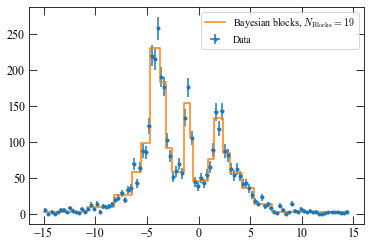

In [8]:
plt.errorbar(0.5 * (bins[1:] + bins[:-1]), 
             nobs, yerr = nerr, 
             xerr = np.diff(bins) / 2.,
             ls = 'None', marker = '.', label = 'Data')

plt.plot(
    np.concatenate([bins[:-1][mask][bbf],[bins[1:][-1]]]),
    np.concatenate([avg,[avg[-1]]]),
    marker = 'None', drawstyle = 'steps-post',
    label = 'Bayesian blocks, $N_\mathrm{{Blocks}} = {0:n}$'.format(bbf.size))

plt.legend(loc = 0)

### Calculate the 'water sheds'

The last vector ```id_sheds``` contains the indices for the bayesian block in each water shed

In [9]:
id_peaks_vec,id_hop_work, id_sheds = hop.hop(avg)

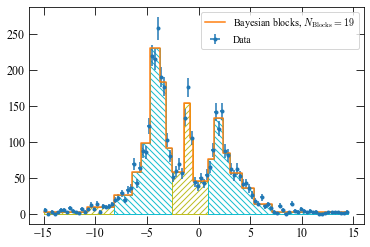

In [10]:
plt.errorbar(0.5 * (bins[1:] + bins[:-1]), 
             nobs, yerr = nerr, 
             xerr = np.diff(bins) / 2.,
             ls = 'None', marker = '.', label = 'Data')

plt.plot(
    np.concatenate([bins[:-1][mask][bbf],[bins[1:][-1]]]),
    np.concatenate([avg,[avg[-1]]]),
    marker = 'None', drawstyle = 'steps-post',
    label = 'Bayesian blocks, $N_\mathrm{{Blocks}} = {0:n}$'.format(bbf.size))

hop.plot_sheds(xmin=bins[:-1][mask],
              xmax = bins[1:][mask],
              id_sheds = id_sheds,
              y = avg, bbf = bbf)

plt.legend(loc = 0)